In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
plt.rcParams['font.family'] = ['Microsoft JhengHei']  # 設定中文字體為微軟正黑
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings("ignore")
primaryColor = '#fd4d58'
secondaryColor = '#969494'
sns.set(style='white',font ='Microsoft JhengHei', font_scale=2)

In [4]:
df = pd.read_csv('detailed listings.csv')
# calenderData = pd.read_csv('calendar.csv', parse_dates=['date'])

In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,68398,https://www.airbnb.com/rooms/68398,20230925193625,2023-09-25,city scrape,Rental unit in Daan District · ★4.71 · 1 bedro...,Convenient location; close to MRT and walking ...,Locates in a quiet neighborhood of Tonghua Str...,https://a0.muscache.com/pictures/69e75442-f365...,339014,https://www.airbnb.com/users/show/339014,Lisa,2011-01-07,Taiwan,Hello world!! My name is Lisa and I'm super ex...,within an hour,100%,83%,t,https://a0.muscache.com/im/users/339014/profil...,https://a0.muscache.com/im/users/339014/profil...,Da'an,7,12,"['email', 'phone']",t,t,"Daan District, Taiwan",大安區,NaN,25.028775,121.554686,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Ethernet connection"", ""Kitchen"", ""Drying rac...","$1,029.00",30,365,30,30,365,365,30.0,365.0,NaN,t,0,5,19,294,2023-09-25,7,0,0,2012-11-16,2019-04-01,4.71,4.86,4.57,5.00,5.00,5.00,4.71,NaN,f,7,7,0,0,0.05
1,271733,https://www.airbnb.com/rooms/271733,20230925193625,2023-09-25,city scrape,Rental unit in Wenshan District · ★4.97 · 2 be...,"Yes! You get the whole apartment. It's nice, i...",A family neighborhood -- very quiet and safe. ...,https://a0.muscache.com/pictures/miso/Hosting-...,242033,https://www.airbnb.com/users/show/242033,Robyn And David,2010-09-22,Taiwan,"Hello,\r\n\r\nWe are a journalist and musician...",within a day,100%,57%,f,https://a0.muscache.com/im/users/242033/profil...,https://a0.muscache.com/im/users/242033/profil...,Wenshan,1,1,"['email', 'phone']",t,t,"Wenshan District, Taipei, Taiwan",文山區,NaN,25.005810,121.555180,Entire rental unit,Entire home/apt,2,NaN,1 bath,2.0,2.0,"[""Kitchen"", ""Rice maker"", ""Drying rack for clo...","$1,200.00",14,182,14,14,182,182,14.0,182.0,NaN,t,0,0,0,56,2023-09-25,67,3,0,2012-01-07,2023-08-11,4.97,4.95,4.92,4.97,4.98,4.82,4.94,NaN,f,1,1,0,0,0.47
2,289296,https://www.airbnb.com/rooms/289296,20230925193625,2023-09-25,city scrape,Rental unit in Daan District · ★4.57 · 2 bedro...,"Zhongxiao East Road, Daan District<br /><br />...",NaN,https://a0.muscache.com/pictures/57880667/43e7...,1338052,https://www.airbnb.com/users/show/1338052,Herman,2011-10-26,Taiwan,Hello! I am a backpacker and I love traveling....,within an hour,100%,100%,f,https://a0.muscache.com/im/users/1338052/profi...,https://a0.muscache.com/im/users/1338052/profi...,Zhongshan,2,12,"['email', 'phone']",t,t,NaN,大安區,NaN,25.042870,121.551120,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Essentials"", ""Kitchen"", ""Dishes and silverwa...","$2,669.00",28,1125,28,28,1125,1125,28.0,1125.0,NaN,t,30,43,43,313,2023-09-25,28,3,0,2014-11-24,2023-05-20,4.57,4.68,4.82,4.79,4.86,4.89,4.54,NaN,f,2,2,0,0,0.26
3,289298,https://www.airbnb.com/rooms/28929

In [21]:
df['amenities'][0]

'["Ethernet connection", "Kitchen", "Drying rack for clothing", "Dedicated workspace", "Cleaning products", "Host greets you", "Hangers", "Bed linens", "Shampoo", "Long term stays allowed", "Clothing storage: closet", "Washer", "Extra pillows and blankets", "Fire extinguisher", "Cooking basics", "Body soap", "Heating", "TV with standard cable", "Air conditioning", "Hot water", "Stove", "Hot water kettle", "Refrigerator", "Wifi", "Hair dryer", "Dishes and silverware"]'

#### 刪除不必要的欄位

In [6]:
df = df.drop(['listing_url', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url',
              'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_verifications',
              'latitude', 'longitude', 'neighbourhood_group_cleansed', 'neighbourhood', 'license', 'bathrooms',
              'scrape_id', 'last_scraped', 'calendar_last_scraped', 'calendar_updated', 'source', 'host_id',
              'host_location', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
              'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
              'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1)

#### 布林值轉換 t / f → 1 / 0

In [7]:
label_encoder = LabelEncoder()
df[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'has_availability']] = df[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'has_availability']].apply(label_encoder.fit_transform)

#### 含有雜訊如 %、$ 之欄位

In [8]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

#### 時間戳記改成與 2023/09/25 的距離天數

In [10]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [11]:
latest_host_since_date = df['host_since'].max()
first_review_since_date = df['first_review'].max()
last_review_since_date = df['last_review'].max()

print("The latest host_since date is:", latest_host_since_date)
print("The latest first_review date is:", first_review_since_date)
print("The latest last_review date is:", last_review_since_date)

The latest host_since date is: 2023-09-21 00:00:00
The latest first_review date is: 2023-09-25 00:00:00
The latest last_review date is: 2023-09-25 00:00:00


In [12]:
reference_date = pd.to_datetime('2023-09-25')

df['host_since_days'] = (reference_date - df['host_since']).dt.days
df['first_review_days'] = (reference_date - df['first_review']).dt.days
df['last_review_days'] = (reference_date - df['last_review']).dt.days

df = df.drop(['host_since', 'first_review', 'last_review'], axis=1)

In [13]:
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_since_days,first_review_days,last_review_days
0,68398,within an hour,100.0,83.0,1,1,1,大安區,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Ethernet connection"", ""Kitchen"", ""Drying rac...",1029.0,30,365,30,30,365,365,30.0,365.0,1,0,5,19,294,7,0,0,4.71,4.86,4.57,5.00,5.00,5.00,4.71,0,0.05,4644,3965.0,1638.0
1,271733,within a day,100.0,57.0,0,1,1,文山區,Entire rental unit,Entire home/apt,2,1 bath,2.0,2.0,"[""Kitchen"", ""Rice maker"", ""Drying rack for clo...",1200.0,14,182,14,14,182,182,14.0,182.0,1,0,0,0,56,67,3,0,4.97,4.95,4.92,4.97,4.98,4.82,4.94,0,0.47,4751,4279.0,45.0
2,289296,within an hour,100.0,100.0,0,1,1,大安區,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Essentials"", ""Kitchen"", ""Dishes and silverwa...",2669.0,28,1125,28,28,1125,1125,28.0,1125.0,1,30,43,43,313,28,3,0,4.57,4.68,4.82,4.79,4.86,4.89,4.54,0,0.26,4352,3227.0,128.0
3,289298,within an hour,100.0,100.0,0,1,1,中山區,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Kitchen"", ""Microwave"", ""Hangers"", ""Shampoo"",...",2218.0,30,1125,30,30,1125,1125,30.0,1125.0,1,1,31,61,336,187,0,0,4.84,4.87,4.94,4.91,4.96,4.61,4.72,0,1.48,4352,3792.0,621.0
4,333362,within a few hours,90.0,85.0,0,1,1,中山區,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Essentials"", ""Kitchen"", ""Dedicated workspace...",1865.0,4,565,4,4,565,565,4.0,565.0,1,25,30,42,278,84,5,1,4.78,4.71,4.56,4.78,4.90,4.67,4.72,0,0.60,4251,4223.0,7.0


#### 刪除價格離群值

In [14]:
df.describe()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_since_days,first_review_days,last_review_days
count,4.869000e+03,4139.000000,4296.000000,4869.000000,4869.000000,4869.000000,4869.000000,3431.000000,4823.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,3712.000000,3702.000000,3703.000000,3703.000000,3703.000000,3701.000000,3703.000000,4869.000000,3711.000000,4869.000000,3711.000000,3711.000000
mean,3.809812e+17,93.882339,83.359404,0.410762,0.976997,0.935716,3.704868,1.574468,2.236160,3944.401520,14.622921,563.227357,13.480591,15.284042,671.413637,683.109263,14.749476,680.093715,0.930170,11.201479,25.470939,41.796057,136.051140,29.716369,6.951119,0.752105,4.684828,4.736469,4.645649,4.812360,4.845874,4.804807,4.642128,0.223249,1.262312,2302.991374,1213.564807,311.297763
std,4.298303e+17,20.241317,26.438793,0.606808,0.149927,0.245284,2.782328,0.963280,2.131513,28844.328055,46.148869,466.187333,45.887938,46.522196,481.926258,479.267974,46.208072,478.347195,0.254886,10.779856,21.669442,32.192405,114.305254,53.888929,11.484336,1.380682,0.484431,0.413538,0.472184,0.341173,0.326767,0.311137,0.433208,0.416467,1.259734,1092.911911,1053.581592,578.698205
min,6.839800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.010000,4.000000,0.000000,0.000000
25%,2.468429e+07,100.000000,82.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1217.000000,1.000000,360.000000,1.000000,2.000000,365.000000,365.000000,1.800000,365.000000,1.000000,0.000000,3.000000,9.000000,44.000000,1.000000,0.000000,0.000000,4.600000,4.670000,4.530000,4.770000,4.830000,4.750000,4.550000,0.000000,0.320000,1649.000000,168.000000,15.000000
50%,4.645554e+07,100.000000,95.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1984.000000,3.000000,365.000000,2.000000,3.000000,365.000000,365.000000,3.000000,365.000000,1.000000,8.000000,23.000000,41.000000,103.000000,6.000000,2.000000,0.000000,4.800000,4.850000,4.760000,4.900000,4.940000,4.890000,4.740000,0.000000,0.890000,2526.000000,1212.000000,37.000000
75%,8.633206e+17,100.000000,100.000000,1.000000,1.000000,1.000000,5.000000,2.000000,3.000000,3225.000000,15.000000,1125.000000,7.000000,20.000000,1125.000000,1125.000000,15.000000,1125.000000,1.000000,21.000000,45.000000,72.000000,219.000000,31.000000,9.000000,1.000000,5.000000,5.000000,4.940000,5.000000,5.000000,5.000000,4.890000,0.000000,1.800000,3134.000000,2043.000000,183.000000
max,9.876279e+17,100.000000,100.000000,2.000000,1.000000,1.000000,16.000000,9.000000,33.000000,1000000.000000,1125.000000,10000.000000,1125.000000,1125.000000,10000.000000,10000.000000,1125.000000,10000.000000,1.000000,30.000000,60.000000,90.000000,365.000000,442.000000,165.000000,21.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,9.880000,5072.000000,4279.000000,3568.000000


In [15]:
q1, q98 = df['price'].quantile([0.01, 0.98])
generalPrice = df[(q1 <= df['price']) & (q98 >= df['price'])]
print("remove listing count: ", len(df) - len(generalPrice), "cases")

df = df[(df['price'] >= q1) & (df['price'] <= q98)]

remove listing count:  147 cases


#### EDA

In [ ]:
ranges = [i*1000 for i in range(15)]
listingPriceRangCount = df['price'].groupby(pd.cut(df['price'], ranges)).count()
intervalLeft = [key.left for key in listingPriceRangCount.keys()]

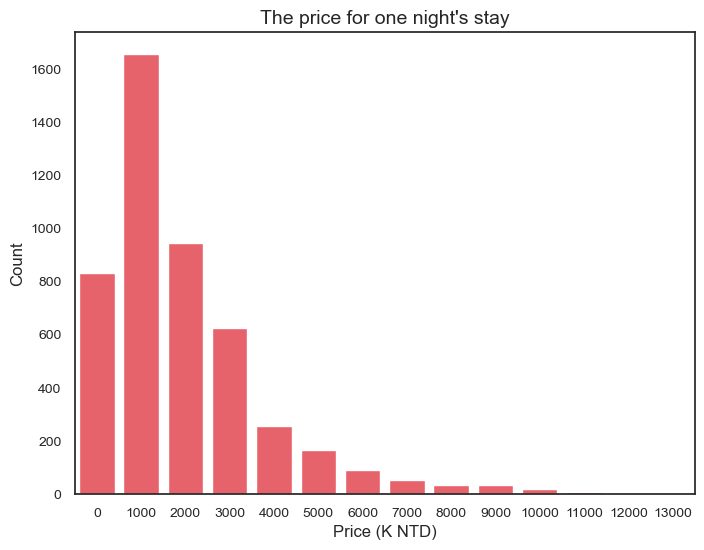

In [ ]:
plt.rcParams['font.family'] = 'Arial'

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(data=listingPriceRangCount, x=intervalLeft, y=listingPriceRangCount.values, color=primaryColor)
ax1.set_title("The price for one night's stay", fontsize=14)
ax1.set_xlabel('Price (K NTD)', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

plt.show()

In [ ]:
totalListingCount = calenderData.groupby([pd.Grouper(key='date', freq='M')]).agg(listingIdCount = ('listing_id','count')).reset_index()
stateListingCount = calenderData.groupby([pd.Grouper(key='date', freq='M'), 'available']).agg(listingIdCount = ('listing_id','count')).reset_index().sort_values('available', ascending=False)
supplyAndDemandListingCount = totalListingCount.merge(stateListingCount[stateListingCount['available'] == "f"], how='left', on='date', suffixes=('_total', '_booked'))
supplyAndDemandListingCount.sort_values('date', inplace=True)

[Text(0, 0, '2023-09-30'),
 Text(1, 0, '2023-10-31'),
 Text(2, 0, '2023-11-30'),
 Text(3, 0, '2023-12-31'),
 Text(4, 0, '2024-01-31'),
 Text(5, 0, '2024-02-29'),
 Text(6, 0, '2024-03-31'),
 Text(7, 0, '2024-04-30'),
 Text(8, 0, '2024-05-31'),
 Text(9, 0, '2024-06-30'),
 Text(10, 0, '2024-07-31'),
 Text(11, 0, '2024-08-31'),
 Text(12, 0, '2024-09-30')]

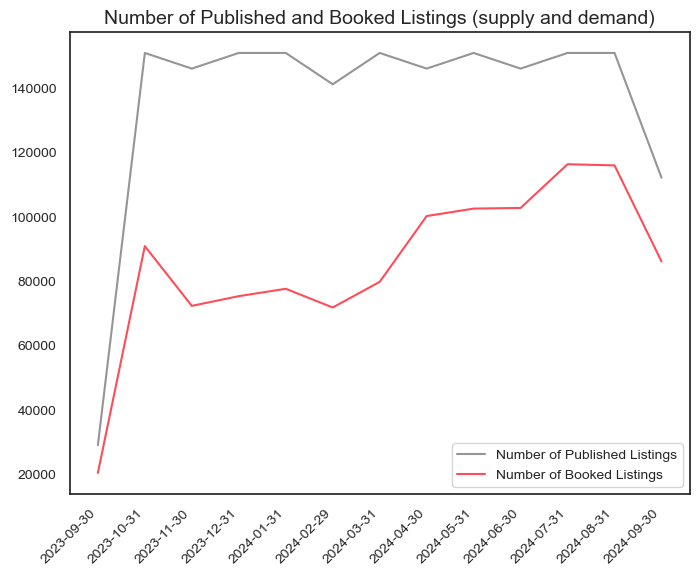

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8,6))
xData = supplyAndDemandListingCount['date'].dt.strftime('%Y-%m-%d')
yData_total = supplyAndDemandListingCount['listingIdCount_total']
yData_booked = supplyAndDemandListingCount['listingIdCount_booked']
ax1.plot(xData, yData_total, label = "Number of Published Listings", color=secondaryColor) # 刊登房源數
ax1.plot(xData, yData_booked,label = "Number of Booked Listings", color=primaryColor) # 已預訂房源數
ax1.set_title("Number of Published and Booked Listings (supply and demand)", fontsize=14)

ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

legend = ax1.legend(fontsize=10)
ax1.set_xticklabels(labels=xData, rotation=45, ha='right')

In [ ]:
neighbourhoodCount = df.groupby(['neighbourhood_cleansed'], as_index=False).agg(listingCount = ('id','count')).sort_values('listingCount', ascending = False)
neighbourhoodCount.head()

,neighbourhood_cleansed,listingCount
11,萬華區,1066
8,大安區,864
1,中正區,706
0,中山區,581
2,信義區,546


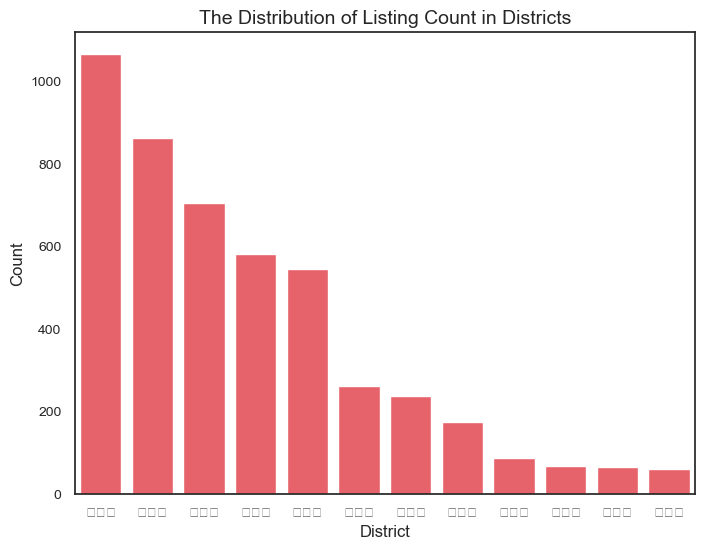

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(data = neighbourhoodCount, x = 'neighbourhood_cleansed', y = 'listingCount', color = primaryColor).set_title("The Distribution of Listing Count in Districts", fontsize=14)
ax1.set_xlabel('District', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

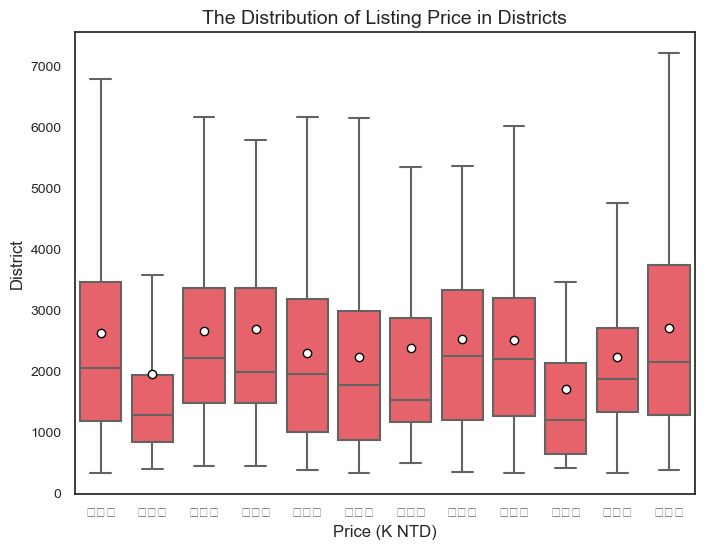

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(data =generalPrice, x="neighbourhood_cleansed", y="price", color = primaryColor, ax=ax1, showmeans = True, showfliers = False, meanprops={"marker":"o", "markerfacecolor":"white",  "markeredgecolor":"black", "markersize":"6"})\
    .set_title("The Distribution of Listing Price in Districts", fontsize=14)
ax1.set_xlabel('Price (K NTD)', fontsize=12)
ax1.set_ylabel('District', fontsize=12)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

In [ ]:
def getFirstNumFromStr(text):
    findNum = re.findall("\d+", str(text))
    return findNum[0] if findNum else 0

In [ ]:
# hostCols = ['host_acceptance_rate', 'host_listings_count']
reviewCols = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'review_scores_rating']
# hostDf = df[['neighbourhood_cleansed'] + hostCols + reviewCols]
# hostDf.loc[:]['host_acceptance_rate_numric'] = hostDf['host_acceptance_rate'].map(getFirstNumFromStr)

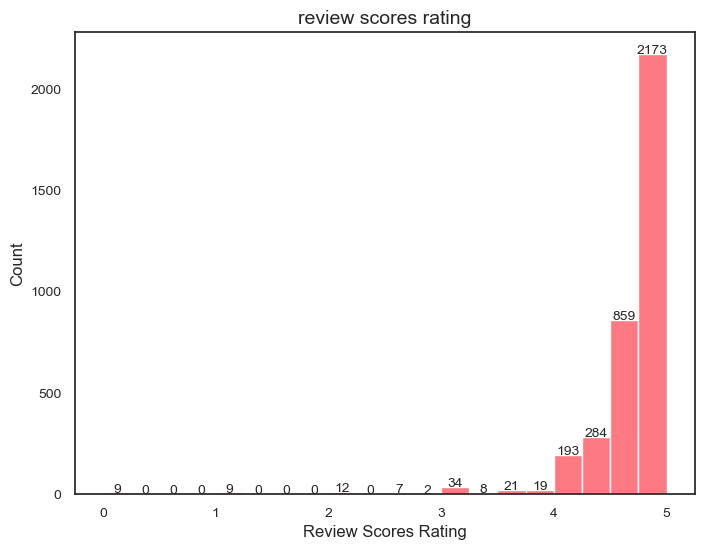

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(data=df, x='review_scores_rating', binwidth=0.25, color = primaryColor)
ax1.set_title("review scores rating", fontsize=14)

ax1.set_xlabel("Review Scores Rating", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10)

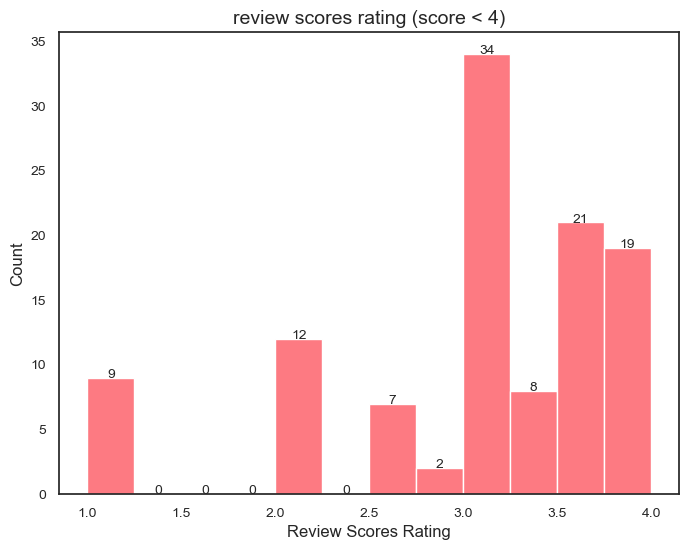

In [ ]:
lowScoreRatingListingDat = df[df['review_scores_rating'] < 4].dropna(subset=reviewCols)
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(data=lowScoreRatingListingDat, x='review_scores_rating', binwidth=0.25, color=primaryColor)
ax1.set_title("review scores rating (score < 4)", fontsize=14)

ax1.set_xlabel("Review Scores Rating", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10)

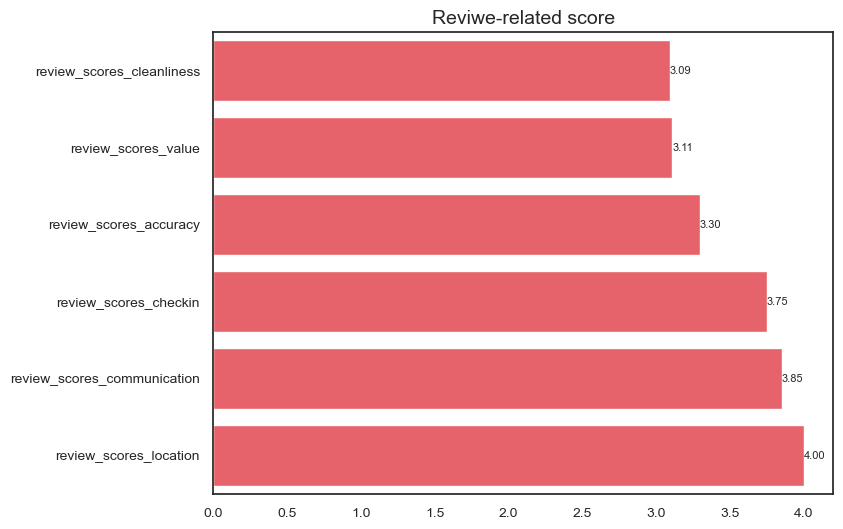

In [ ]:
meanReviewInfo_lowScoreListing = lowScoreRatingListingDat[reviewCols].mean().sort_values()
meanReviewInfo_lowScoreListing.drop(['reviews_per_month', 'review_scores_rating'], axis=0, inplace=True)
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(y = meanReviewInfo_lowScoreListing.keys(), x = meanReviewInfo_lowScoreListing.values, orient='h', color=primaryColor).set_title('Reviwe-related score', fontsize=14)
ax1.bar_label(ax1.containers[0], fmt="%.2f", padding=0, fontsize=8)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

#### 缺失值

In [16]:
# 缺失值比例
(df.isnull().sum() / df.shape[0]) * 100

id                              0.000000
host_response_time             14.548920
host_response_rate             14.548920
host_acceptance_rate           11.308767
host_is_superhost               0.000000
host_has_profile_pic            0.000000
host_identity_verified          0.000000
neighbourhood_cleansed          0.000000
property_type                   0.000000
room_type                       0.000000
accommodates                    0.000000
bathrooms_text                  0.190597
bedrooms                       28.970775
beds                            0.910631
amenities                       0.000000
price                           0.000000
minimum_nights                  0.000000
maximum_nights                  0.000000
minimum_minimum_nights          0.000000
maximum_minimum_nights          0.000000
minimum_maximum_nights          0.000000
maximum_maximum_nights          0.000000
minimum_nights_avg_ntm          0.000000
maximum_nights_avg_ntm          0.000000
has_availability

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4722 entries, 0 to 4868
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4722 non-null   int64  
 1   host_response_time           4035 non-null   object 
 2   host_response_rate           4035 non-null   float64
 3   host_acceptance_rate         4188 non-null   float64
 4   host_is_superhost            4722 non-null   int64  
 5   host_has_profile_pic         4722 non-null   int64  
 6   host_identity_verified       4722 non-null   int64  
 7   neighbourhood_cleansed       4722 non-null   object 
 8   property_type                4722 non-null   object 
 9   room_type                    4722 non-null   object 
 10  accommodates                 4722 non-null   int64  
 11  bathrooms_text               4713 non-null   object 
 12  bedrooms                     3354 non-null   float64
 13  beds              

In [18]:
# 用眾數填補類別變數空值
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)

# MICE填補數值型變數空值
mice_imputer = IterativeImputer()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = mice_imputer.fit_transform(df[numerical_columns])

In [20]:
numerical_columns

Index(['id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'host_since_days', 'first_review_days',
       'last_review_days'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4722 entries, 0 to 4868
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           4722 non-null   float64
 1   host_response_time           4722 non-null   object 
 2   host_response_rate           4722 non-null   float64
 3   host_acceptance_rate         4722 non-null   float64
 4   host_is_superhost            4722 non-null   float64
 5   host_has_profile_pic         4722 non-null   float64
 6   host_identity_verified       4722 non-null   float64
 7   neighbourhood_cleansed       4722 non-null   object 
 8   property_type                4722 non-null   object 
 9   room_type                    4722 non-null   object 
 10  accommodates                 4722 non-null   float64
 11  bathrooms_text               4722 non-null   object 
 12  bedrooms                     4722 non-null   float64
 13  beds                   

#### 類別變數編碼

In [ ]:
df['bathrooms_text'].value_counts()

bathrooms_text
1 bath               2323
1 private bath        599
2 baths               520
1 shared bath         444
1.5 baths             308
1.5 shared baths       98
3 baths                84
2 shared baths         78
3 shared baths         41
Shared half-bath       29
5 shared baths         23
2.5 shared baths       19
6 shared baths         17
4 baths                16
4.5 baths              15
2.5 baths              15
0 shared baths         13
Half-bath              13
5 baths                11
4 shared baths         10
4.5 shared baths       10
8 shared baths          8
7 shared baths          5
6.5 shared baths        4
3.5 baths               3
0 baths                 2
Private half-bath       2
7.5 shared baths        2
5.5 shared baths        1
9 baths                 1
7.5 baths               1
11 shared baths         1
10 baths                1
3.5 shared baths        1
12 shared baths         1
8 baths                 1
6 baths                 1
6.5 baths              

In [ ]:
# 分析 'bathrooms_text' 欄位並創建新的欄位
def parse_bathrooms(text):
    if pd.isnull(text):
        return [0, 0, 0]  # 假設空值表示沒有浴室
    num_baths = float(text.split()[0])  # 獲取浴室數量
    if "shared" in text:
        return [num_baths, 0, 0]
    elif "private" in text:
        return [0, num_baths, 0]
    else:
        return [0, 0, num_baths]

# 把Half-bath轉換為數值0.5
df['bathrooms_text'] = df['bathrooms_text'].replace({'Shared half-bath': '0.5 shared bath', 'Half-bath': '0.5 bath', 'Private half-bath': '0.5 private bath'})

# 創建三個不同的新欄位
df[['shared_bath', 'private_bath', 'bath']] = df['bathrooms_text'].apply(lambda x: pd.Series(parse_bathrooms(x)))

# 查看結果
print(df[['bathrooms_text', 'shared_bath', 'private_bath', 'bath']].head(30))

    bathrooms_text  shared_bath  private_bath  bath
0           1 bath          0.0           0.0   1.0
1           1 bath          0.0           0.0   1.0
2           1 bath          0.0           0.0   1.0
3           1 bath          0.0           0.0   1.0
4           1 bath          0.0           0.0   1.0
5           1 bath          0.0           0.0   1.0
6           1 bath          0.0           0.0   1.0
7           1 bath          0.0           0.0   1.0
8           1 bath          0.0           0.0   1.0
9           1 bath          0.0           0.0   1.0
10          1 bath          0.0           0.0   1.0
11          1 bath          0.0           0.0   1.0
12          1 bath          0.0           0.0   1.0
13          1 bath          0.0           0.0   1.0
14          1 bath          0.0           0.0   1.0
15          1 bath          0.0           0.0   1.0
16          1 bath          0.0           0.0   1.0
17       1.5 baths          0.0           0.0   1.5
18  0 shared

In [ ]:
df.isna().sum()

id                             0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
has_availability               0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_

In [ ]:
# 將類別變數做獨熱編碼
df = df.reset_index()
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[['host_response_time','room_type','neighbourhood_cleansed', 'property_type']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['host_response_time','room_type','neighbourhood_cleansed', 'property_type']))

# 將編碼後的數據合併回原始數據集
df_copy = df.copy()
df = df.join(encoded_df)
df = df.drop(columns=['id','amenities','bathrooms_text','host_response_time','room_type','neighbourhood_cleansed', 'property_type'], axis=1)

#### amenities 欄位處理

In [ ]:
df_copy['amenities'].head()

# 編碼
df_copy['amenities'] = df_copy['amenities'].str.replace('"', '')
df_copy['amenities'] = df_copy['amenities'].str.replace(']', "")
df_copy['amenities'] = df_copy['amenities'].str.replace('[', "")
df_amenities = df_copy['amenities'].str.get_dummies(sep = ",")

In [ ]:
df_amenities.head()

,baby bath tub induction stove,100\ HDTV with Apple TV,100\ TV with Chromecast,100\ TV with Disney+,1010 HOPE /NEOM body soap,101\ HDTV,120\ HDTV with Chromecast,120\ HDTV with Netflix,150\ HDTV with Netflix,2-5 years old,200\ HDTV with Netflix,20\ TV with standard cable,22\ TV with Chromecast,24\ HDTV,24\ TV with Chromecast,27\ HDTV with Netflix,27\ HDTV with standard cable,30\ TV with standard cable,32\ HDTV,32\ HDTV with Amazon Prime Video,32\ HDTV with Chromecast,32\ HDTV with Disney+,32\ HDTV with Netflix,32\ HDTV with premium cable,32\ HDTV with standard cable,32\ TV,32\ TV with Chromecast,32\ TV with Disney+,32\ TV with Netflix,32\ TV with premium cable,32\ TV with standard cable,35\ HDTV,36\ HDTV with standard cable,37\ HDTV,38\ HDTV with premium cable,38\ HDTV with standard cable,39\ TV,3\ HDTV,40\ HDTV,40\ HDTV with Disney+,40\ HDTV with Netflix,40\ HDTV with premium cable,40\ HDTV with standard cable,40\ TV,40\ TV with Chromecast,40\ TV with Netflix,40\ TV with premium cable,40\ TV with standard cable,41\ HDTV with Amazon Prime Video,42\ HDTV,42\ HDTV with Chromecast,42\ HDTV with DVD player,42\ HDTV with Disney+,42\ HDTV with HBO Max,42\ HDTV with Netflix,42\ HDTV with premium cable,42\ HDTV with standard cable,42\ TV,42\ TV with Chromecast,42\ TV with HBO Max,42\ TV with Netflix,42\ TV with Roku,42\ TV with premium cable,42\ TV with standard cable,43\ HDTV,43\ HDTV with Amazon Prime Video,43\ HDTV with Chromecast,43\ HDTV with Disney+,43\ HDTV with HBO Max,43\ HDTV with Netflix,43\ HDTV with premium cable,43\ HDTV with standard cable,43\ TV with Chromecast,43\ TV with Netflix,43\ TV with standard cable,44\ HDTV with standard cable,45\ HDTV with Netflix,45\ HDTV with standard cable,45\ TV,45\ TV with standard cable,46\ HDTV with Apple TV,46\ HDTV with standard cable,47\ HDTV,47\ HDTV with standard cable,48\ HDTV,48\ TV with standard cable,49\ HDTV,49\ HDTV with Apple TV,49\ HDTV with standard cable,5-10 years old,50\ HDTV,50\ HDTV with Apple TV,50\ HDTV with Chromecast,50\ HDTV with DVD player,50\ HDTV with Disney+,50\ HDTV with Netflix,50\ HDTV with premium cable,50\ HDTV with standard cable,50\ TV,50\ TV with Apple TV,50\ TV with Chromecast,50\ TV with Netflix,50\ TV with standard cable,52\ TV with Roku,55\ HDTV,55\ HDTV with Amazon Prime Video,55\ HDTV with Apple TV,55\ HDTV with Chromecast,55\ HDTV with Disney+,55\ HDTV with HBO Max,55\ HDTV with Netflix,55\ HDTV with premium cable,55\ HDTV with standard cable,55\ TV,55\ TV with Chromecast,55\ TV with Netflix,55\ TV with premium cable,55\ TV with standard cable,56\ HDTV with standard cable,60\ HDTV,60\ HDTV with Chromecast,60\ HDTV with Netflix,60\ HDTV with premium cable,60\ HDTV with standard cable,60\ TV,60\ TV with premium cable,60\ TV with standard cable,65\ HDTV,65\ HDTV with Amazon Prime Video,65\ HDTV with Apple TV,65\ HDTV with Chromecast,65\ HDTV with Disney+,65\ HDTV with Netflix,65\ HDTV with premium cable,65\ HDTV with standard cable,65\ TV,65\ TV with Netflix,65\ TV with standard cable,70\ HDTV with Netflix,70\ HDTV with standard cable,70\ TV with Netflix,75\ HDTV with Apple TV,75\ HDTV with Netflix,75\ HDTV with standard cable,75\ TV with standard cable,80\ HDTV,AC - split type ductless system,AEG electric stove,Air conditioning,Amazon Prime Video,Apple Bluetooth sound system,Apple TV,Asko stainless steel single oven,B&O sound system with aux,BANG & OLUFSEN Bluetooth sound system,BBQ grill,BBQ grill: charcoal,BOSE Bluetooth sound system,BOSE sound system,Baby bath,Baby bath - always at the listing,Baby bath - available upon request,Baby monitor,Baby monitor - available upon request,Baby safety gates,Babysitter recommendations,Backyard,Backyard - Fully fenced,Baking sheet,Barbecue utensils,Basic shampoo,Basic and small one refrigerator,Bathtub,Baumatic oven,Bay view,Beach access,Beach access \u2013 Beachfront,Beach essentials,Bed linens,Bidet,Bikes,Bior body soap,Blender,Blomberg refrigerator,Bluetooth sound system,Board games,Body Shop body soap,

In [ ]:
# 匯入事先分類好的 amenities category
amenities_category = pd.read_excel('Amenities.xlsx')
amenities_category.head(10)

,Oringinal Column,New Category
0,and 5-10 years old,0
1,and 10+ years old,0
2,5-10 years old,0
3,2-5 years old,0
4,Window AC unit,air conditioning
5,Heating - split type ductless system,air conditioning
6,AC - split type ductless system,air conditioning
7,Portable air conditioning,air conditioning
8,Central air conditioning,air conditioning
9,Air conditioning,air conditioning


In [ ]:
df_amenities.rename(columns=lambda x: x.strip(), inplace=True)
oringinal_column = pd.DataFrame(df_amenities.columns, columns=['Oringinal Column'])
category_dict = dict()

for category in amenities_category['New Category'].unique():
    items = list(amenities_category[amenities_category['New Category'] == category]['Oringinal Column'])
    category_dict[category] = items

In [ ]:
df_amenities_category = pd.DataFrame()
for key, value in category_dict.items():
    items = df_amenities[value]
    df_amenities_category[key] = df_amenities[items.columns].any(axis=1)
df_amenities_category = df_amenities_category.drop(0, axis='columns')
df_amenities_category = df_amenities_category.astype(int)
df_amenities_category.head()

,air conditioning,baby stuffs,Backyard,balcony,bathroom products,BBQ,beach,bedroom supplies,bidet,books,breakfast,building staff,cable,changing table,children stuffs,cleaning available during stay,cleaning products,clothing storage,clothing supplies,coffee,ceiling fan,dining table,dreeser,dryer,elevator,essentials,ethernet connection,EV charger,exercise equipment,fire extinguisher,first aid kit,game,gas,gym,hammock,heating,host greets you,hot water,infinity,Iron,keypad,kitchen,lake access,laundromat nearby,lock,long term stays allowed,luggage dropoff allowed,microwave,mosquito net,open 24 hours,open specific hours,outdoor dining area,outdoor furniture,outdoor shower,outlet covers,oven,parking,pets allowed,piano,pool,portable fans,private entrance,private living room,record player,refrigerator,resort access,rooftop,room-darkening shades,safe,sauna,security cameras on property,self check-in,single level home,smoke alarm,smoking allowed,sound system,stove,streaming service,streaming services,table corner guards,trash compactor,tub,TV,utensils,view,washer,waterfront,wifi,window guards,workspace
0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1
1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1
2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1


In [ ]:
# 把 amenities category 的 one-hot encoding 合併到原本的 df
df = pd.concat([df, df_amenities_category], axis=1)
df = df.drop(df.columns[0], axis=1)
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_since_days,first_review_days,last_review_days,shared_bath,private_bath,bath,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_中山區,neighbourhood_cleansed_中正區,neighbourhood_cleansed_信義區,neighbourhood_cleansed_內湖區,neighbourhood_cleansed_北投區,neighbourhood_cleansed_南港區,neighbourhood_cleansed_士林區,neighbourhood_cleansed_大同區,neighbourhood_cleansed_大安區,neighbourhood_cleansed_文山區,neighbourhood_cleansed_松山區,neighbourhood_cleansed_萬華區,property_type_Barn,property_type_Cave,property_type_Entire bungalow,property_type_Entire chalet,property_type_Entire condo,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire loft,property_type_Entire place,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Farm stay,property_type_Minsu,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in bungalow,property_type_Private room in casa particular,property_type_Private room in cave,property_type_Private room in condo,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in home,property_type_Private room in hostel,property_type_Private room in loft,property_type_Private room in minsu,property_type_Private room in rental unit,property_type_Private room in serviced apartment,property_type_Private room in tent,property_type_Private room in tiny home,property_type_Private room in townhouse,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in boutique hotel,property_type_Room in heritage hotel,property_type_Room in hostel,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Shared room,property_type_Shared room in aparthotel,property_type_Shared room in bed and breakfast,property_type_Shared room in boutique hotel,property_type_Shared room in cave,property_type_Shared room in condo,property_type_Shared room in guest suite,property_type_Shared room in home,property_type_Shared room in hostel,property_type_Shared room in loft,property_type_Shared room in minsu,property_type_Shared room in rental unit,property_type_Shared room in serviced apartment,property_type_Tiny home,air conditioning,baby stuffs,Backyard,balcony,bathroom products,BBQ,beach,bedroom supplies,bidet,books,breakfast,building staff,cable,changing table,children stuffs,cleaning available during stay,cleaning products,clothing storage,clothing supplies,coffee,ceiling fan,dining table,dreeser,dryer,elevator,essentials,ethernet connection,EV charger,exercise equipment,fire extinguisher,first aid kit,game,gas,gym,hammock,heating,host greets you,hot water,infinity,Iron,keypad,kitchen,lake access,laundromat nearby,lock,long term stays allowed,luggage dropoff allowed,microwave,mosquito net,open 24 hours,open specific hours,outdoor dining area,outdoor furniture,outdoor shower,outlet covers,oven,parking,pets allowed,piano,pool,portable fans,private entrance,private living room,record player,refrigerator,resort access,rooftop,room-darkening shades,safe,sauna,security cameras o

#### 高相關欄位

In [ ]:
# 計算相關矩陣
corr_matrix = df.corr()

# # 可視化相關矩陣(太多欄位了⋯⋯)
# plt.figure(figsize=(8, 6))
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# # ax = sns.heatmap(corr_matrix, annot=False, fmt=".2f")
# ax = sns.heatmap(corr_matrix, cmap=cmap)
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=10)

# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.show()

In [ ]:
# 找出高度相關的列對
highly_correlated_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if (i != j and abs(corr_matrix[i][j]) > 0.7)]
df_highly_correlated = pd.DataFrame(highly_correlated_pairs, columns=['Column1', 'Column2'])

set_df_highly_correlated = set()
for index, row in df_highly_correlated.iterrows():
    if (row['Column2'], row['Column1']) not in set_df_highly_correlated:
        set_df_highly_correlated.add((row['Column1'], row['Column2']))

df_unique_highly_correlated = pd.DataFrame(set_df_highly_correlated, columns=['Column1', 'Column2'])
df_unique_highly_correlated = df_unique_highly_correlated.sort_values(by='Column1')

print("DataFrame of Unique Highly Correlated Pairs:")
df_unique_highly_correlated

DataFrame of Unique Highly Correlated Pairs:


,Column1,Column2
4,availability_30,availability_60
27,availability_30,availability_90
5,availability_60,availability_90
12,bathroom products,dryer
7,bathroom products,essentials
3,first_review_days,last_review_days
21,host_identity_verified,has_availability
10,host_response_rate,host_response_time_a few days or more
19,host_response_time_within a few hours,host_response_time_within an hour
22,maximum_maximum_nights,maximum_nights_avg_ntm


In [ ]:
columns_to_drop = set(df_unique_highly_correlated['Column1'])
df = df.drop(columns_to_drop, axis=1)

#### Export DataFrame

In [ ]:
df.head()

,host_acceptance_rate,host_is_superhost,host_has_profile_pic,accommodates,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_since_days,last_review_days,shared_bath,private_bath,bath,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within an hour,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_中山區,neighbourhood_cleansed_中正區,neighbourhood_cleansed_信義區,neighbourhood_cleansed_內湖區,neighbourhood_cleansed_北投區,neighbourhood_cleansed_南港區,neighbourhood_cleansed_士林區,neighbourhood_cleansed_大同區,neighbourhood_cleansed_大安區,neighbourhood_cleansed_文山區,neighbourhood_cleansed_松山區,neighbourhood_cleansed_萬華區,property_type_Barn,property_type_Cave,property_type_Entire bungalow,property_type_Entire chalet,property_type_Entire condo,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire loft,property_type_Entire place,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Farm stay,property_type_Minsu,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in bungalow,property_type_Private room in casa particular,property_type_Private room in cave,property_type_Private room in condo,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in home,property_type_Private room in hostel,property_type_Private room in loft,property_type_Private room in minsu,property_type_Private room in rental unit,property_type_Private room in serviced apartment,property_type_Private room in tent,property_type_Private room in tiny home,property_type_Private room in townhouse,property_type_Private room in villa,property_type_Room in aparthotel,property_type_Room in boutique hotel,property_type_Room in heritage hotel,property_type_Room in hostel,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Shared room,property_type_Shared room in aparthotel,property_type_Shared room in bed and breakfast,property_type_Shared room in boutique hotel,property_type_Shared room in cave,property_type_Shared room in condo,property_type_Shared room in guest suite,property_type_Shared room in home,property_type_Shared room in hostel,property_type_Shared room in loft,property_type_Shared room in minsu,property_type_Shared room in rental unit,property_type_Shared room in serviced apartment,property_type_Tiny home,air conditioning,baby stuffs,Backyard,balcony,BBQ,beach,bedroom supplies,bidet,books,breakfast,building staff,cable,changing table,children stuffs,cleaning available during stay,cleaning products,clothing storage,clothing supplies,coffee,ceiling fan,dining table,dreeser,dryer,elevator,essentials,ethernet connection,EV charger,exercise equipment,fire extinguisher,first aid kit,game,gas,gym,hammock,heating,host greets you,hot water,infinity,Iron,keypad,kitchen,lake access,laundromat nearby,lock,long term stays allowed,luggage dropoff allowed,microwave,mosquito net,open 24 hours,open specific hours,outdoor dining area,outdoor furniture,outdoor shower,outlet covers,oven,parking,pets allowed,piano,pool,portable fans,private entrance,private living room,record player,refrigerator,resort access,rooftop,room-darkening shades,safe,sauna,security cameras on property,self check-in,single level home,smoke alarm,smoking allowed,sound system,stove,streaming service,streaming services,table corner guards,trash compactor,tub,TV,utensils,view,washer,waterfront,wifi,window guards,workspace
0,83.0,1.0,1.0,2.0,1.0,1.0,1029.0,30.0,365.0,1.0,19.0,294.0,7.0,0.0,0.0,5.00,5.00,4.71,0.0,0.05,4644.0,1638.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
df.to_excel('1126 Preprocessed Data.xlsx', index=False)